# Vamos aprender um pouco de aprendizado de máquina para avaliar as classificações gerais dos jogadores no videogame FIFA

<p>O aprendizado de máquina é a ciência que estuda *algoritmos* e *modelos* que permitem aos computadores reconhecer coisas, tomar decisões e até mesmo prever resultados sem instruções explícitas. Por exemplo, ao falar com o assistente do seu telefone, como Siri ou Cortana, o aprendizado de máquina ajuda a traduzir sua voz em texto e a entender melhor o que você solicitou. Isso é incrível?
</p>
<p>
Hoje vamos mostrar como *ensinar* um computador a avaliar as classificações gerais de jogadores de futebol com base em seus atributos, passo a passo.
</p>
<p> Vamos em frente! </p>

## Um pouco de base

<p>
Suponha que exista uma fórmula para calcular as classificações "gerais" dos jogadores de futebol da EA Sports (desenvolvedora do FIFA 2019). Com esta fórmula, podemos calcular facilmente as classificações gerais de qualquer jogador, mesmo que ele não esteja no jogo. O problema é que não sabemos exatamente como é a fórmula. <br>
Conhecemos a *entrada* que consiste nos atributos do jogador e a *saída* que são as classificações gerais. Então podemos usar uma abordagem chamada “regressão” para “estimar” a fórmula com base na entrada/saída.
</p>
<p>
Hoje vamos usar um modelo simples chamado Regressão Linear.
Suponhamos que a fórmula que calcula as classificações gerais do jogador de futebol $ y = f(x)$ seja
\[
    f(x) = ax + b
\]
A regressão linear visa descobrir $a$ e $b$. A fórmula $f(x)$ é chamada de "modelo" em aprendizado de máquina, e o processo de resolver/estimar o modelo é chamado de "treinamento" do modelo. Depois de treinarmos o modelo, podemos usá-lo para prever o alvo $y$ de novos dados.
</p>
<p>
Voltando à nossa história, se tivermos apenas 1 variável $x$, estimar $f(x)$ deverá ser fácil. Todos deveriam ser capazes de resolvê-lo com uma caneta e um pedaço de papel. Porém, quando $x$ é uma longa lista de atributos de jogadores de futebol como velocidade, potência, passe, desarme, fica complicado. A fórmula deve ser reescrita em
\[
    f(x_1, x_2, ..., x_n) = a_1 * x_1 + a_2 * x_2 + ... + a_n * x_n + b
\]
Então temos que alimentar o modelo com muitos dados de alta qualidade para torná-lo mais próximo da fórmula “real”. Vamos começar!
</p>

## Etapa 1: obter conjunto de dados

FIFA 2019 é um videogame de futebol. Todos os jogadores neste jogo têm uma classificação geral, bem como vários atributos como cruzamento, finalização, etc.

Estamos acessando o site chamado kaggle.com para obter nosso conjunto de dados. <br>

[Conjunto de dados FIFA19](https://www.kaggle.com/karangadiya/fifa19/)

<br>
 *Observação: pode ser necessário se inscrever para obter o link de download*.
<br>

Nesta página você pode encontrar muitas informações sobre este conjunto de dados, reservar um tempo para navegar e familiarizar-se com o conjunto de dados.
![kaggle_fifa_dataset.png](anexo:kaggle_fifa_dataset.png)

Depois de baixá-lo, extraia o arquivo zip para uma pasta, digamos `C:\fifa_dataset\`.

## Etapa 2: iniciar o projeto

Abra o notebook jupyter, novo notebook > python 3

No início do arquivo, vamos importar alguns pacotes necessários.

In [2]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

ImportError: No module named pandas

## Etapa 3: carregar conjunto de dados
Mude `mypath` para a pasta onde você extrai o arquivo do conjunto de dados (ou seja, `C:\fifa_dataset\`). Para verificar se o carregamos com sucesso, usamos uma função chamada `describe()` para imprimir suas estatísticas.

In [3]:
# carregar conjuntos de dados
mypath = "C:/Users/ruilliu/Documents/nuevo_lr_fifa/" # mude para o seu próprio caminho
fifa_data = pd.read_csv(mypath+"data.csv")
fifa_data.describe()

NameError: name 'pd' is not defined

## Etapa 4: Pré-processar dados

Até agora, importamos nosso conjunto de dados. Na vida real, cada jogador de futebol ocupa uma posição específica. Diferentes posições exigem força em diferentes atributos. Então, vamos restringir o escopo ao atacante.
<br>

Primeiro, vamos listar todas as posições.
Esta afirmação parece um pouco mais longa, mas funciona. O `fifa_data['position']` seleciona a coluna de posição do `fifa_data`, o `dropna()` elimina as células que estão em branco e o `unique()` remove todos os itens duplicados para nós.

In [3]:
# para descobrir quantas posições existem
print(fifa_data['Position'].dropna().unique())

['RF' 'ST' 'LW' 'GK' 'RCM' 'LF' 'RS' 'RCB' 'LCM' 'CB' 'LDM' 'CAM' 'CDM'
 'LS' 'LCB' 'RM' 'LAM' 'LM' 'LB' 'RDM' 'RW' 'CM' 'RB' 'RAM' 'CF' 'RWB'
 'LWB']


Agora podemos filtrar os dados pela posição “ST”. Incentivamos você selecionar outras posições para ver qual é a diferença.

In [4]:
#obtém jogadores por posição
fifa_data_by_pos = fifa_data[fifa_data['Position']=='ST']

Vamos traçar um histograma para as avaliações gerais de todos os atacantes.

(array([ 40., 186., 363., 463., 601., 341., 113.,  34.,   9.,   2.]),
 array([47. , 51.7, 56.4, 61.1, 65.8, 70.5, 75.2, 79.9, 84.6, 89.3, 94. ]),
 <a list of 10 Patch objects>)

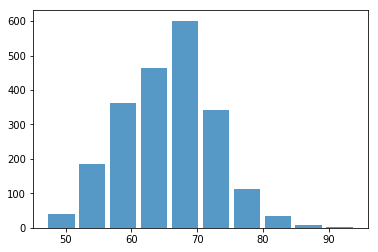

In [24]:
plt.hist(x=fifa_data_by_pos[target], bins=10, alpha=0.75, rwidth=0.85)

A seguir, queremos dividir os dados em dois conjuntos, um é usado para treinar o modelo e outro é usado para verificar se o modelo treinado está bom.

Você pode pensar que deveríamos deixar o máximo possível de dados para treinamento porque isso torna o modelo melhor. O modelo se ajusta melhor, mas apenas para conjuntos de dados de treinamento. Quando você aplica o modelo aos dados de teste, a precisão da previsão pode diminuir. Isso é chamado de "sobreajuste".

Agora deixamos 25% dos dados para teste.

In [5]:
# divide os dados em train_data e test_data aleatoriamente
# você pode alterar a proporção de test_size para ver o que acontecerá
train_data, test_data = train_test_split(fifa_data_by_pos,test_size=0.25)

# imprime o número de jogadores em train_data e test_data
# len() fornece o número de jogadores em formato numérico
# str() converte valor numérico em string
print("O # de dados de treinamento é " + str(len(train_data)))
print("O # de dados de teste é " + str(len(test_data)))

The # of training data is 1614
The # of testing data is 538


# Etapa 5: seleção de recursos

Nossa próxima etapa é selecionar os recursos adequados. Seleção de recursos é um termo em aprendizado de máquina para descrever o método e o processo de escolha de recursos relevantes para o modelo. Um recurso é um $x$ na fórmula. Na nossa história, é um atributo de um jogador de futebol.

Como estamos usando o modelo de regressão linear, a forma como o atributo correlacionado ao alvo ("Geral") torna-se o critério para escolher os recursos corretos.

Usamos uma correlação de função integrada `corr` para calcular a correlação de pares de colunas. Existem três métodos que podemos escolher,
- pearson: coeficiente de correlação padrão
- kendall: coeficiente de correlação Kendall Tau
- spearman: correlação de classificação do lanceiro

Neste tutorial usamos pearson.

In [6]:
# selecione o alvo
target = "Geral"

# Para encontrar a correlação entre as colunas usando o método pearson 
feature_corr = train_data.corr(method ='pearson') [target]

# classifique os recursos
feature_corr = feature_corr.sort_values(ascending = False)

# mostra os 20 principais recursos
# observe que começamos de 1 e não de zero, porque o geral está sempre no topo da lista
print(feature_corr[1:21]) 

Positioning        0.904367
Special            0.903856
Finishing          0.899783
BallControl        0.896988
ShotPower          0.877842
Reactions          0.861441
Volleys            0.834433
Composure          0.827529
ShortPassing       0.813074
Dribbling          0.802565
LongShots          0.794059
HeadingAccuracy    0.711129
Vision             0.671054
Skill Moves        0.649300
Curve              0.641426
Crossing           0.603249
Potential          0.593139
Penalties          0.583906
LongPassing        0.575092
FKAccuracy         0.569704
Name: Overall, dtype: float64


Agora podemos copiar e colar os 10 ou 12 principais recursos. (Nota: Por favor, não copie o espaço)

In [7]:
# selecione alguns recursos
features = ["Posicionamento", "Finalização", "Especial", "ControleDeBola",
            "ForçaDeTiro", "Reações", "Voleios", "Compostura", "PasseCurto"]

Além disso, podemos apenas extrair os nomes dos recursos do índice. Observe que começamos em 1 porque não queremos incluir `geral` quem está sempre no topo da lista.

In [8]:
# extrai nomes de recursos da série
features = feature_corr[1:21].index.tolist()

# mostra as funcionalidades
print(features)

['Positioning', 'Special', 'Finishing', 'BallControl', 'ShotPower', 'Reactions', 'Volleys', 'Composure', 'ShortPassing', 'Dribbling', 'LongShots', 'HeadingAccuracy', 'Vision', 'Skill Moves', 'Curve', 'Crossing', 'Potential', 'Penalties', 'LongPassing', 'FKAccuracy']


## Etapa 6: treinar o modelo
Agora estamos prontos para treinar o modelo. usamos 'LinearRegression().fit()' para treiná-lo. e este objeto de modelo possui uma função `score()` para retornar a pontuação do modelo, que é o coeficiente de determinação R ^ 2 da previsão. Por enquanto você só precisa saber que quanto maior, melhor.

In [9]:
#preparar dados de treinamento
x_train = train_data[features]
y_train = train_data[target]

# Aplicando regressão linear
# fit() é o método para treinar o modelo
model = LinearRegression().fit(x_train,y_train)

# Pontuação do modelo
print("Score: " + str(model.score(x_train,y_train)))

Score: 0.9875123836174596


## Etapa 7: experimente o modelo testando dados

Agora estamos usando o modelo treinado para estimar jogadores em `test_data`. Semelhante ao que fazemos com `train_data`, criamos `x_test` e `y_test`.

`model.predict()` irá gerar uma lista de resultados previstos.

In [13]:
# gostaríamos de classificar os dados de teste no valor alvo ("Geral")
test_data = test_data.sort_values([target], ascending=False)

x_test = test_data[features]
y_test = test_data[target]

y_pred = model.predict(x_test)

Vamos comparar com as avaliações gerais reais

In [14]:
# adiciona uma nova coluna de previsão geral em test_data
test_data['Previsão Geral'] = y_pred.copy()

# adiciona uma nova coluna de proporção de diferença de previsão em test_data
difference = (y_pred - y_test) / y_test * 100
test_data['Diferença (%)'] = difference

#imprime os resultados
test_data[["Nome", "Nacionalidade", "Clube", "Geral", "Previsão Geral", "Diferença (%)"]]

,Name,Nationality,Club,Overall,Predicted Overall,Difference (%)
1,Cristiano Ronaldo,Portugal,Juventus,94,91.973701,-2.155638
10,R. Lewandowski,Poland,FC Bayern München,90,88.135513,-2.071652
23,S. Agüero,Argentina,Manchester City,89,87.807637,-1.339733
48,C. Immobile,Italy,Lazio,87,85.933234,-1.226168
159,Louri Beretta,Brazil,Atlético Mineiro,83,81.583941,-1.706096
193,Rodrigo,Spain,Valencia CF,83,81.784946,-1.463921
179,S. Gnabry,Germany,FC Bayern München,83,79.978980,-3.639783
315,David Villa,Spain,New York City FC,82,81.259066,-0.903578
362,Paco Alcácer,Spain,Borussia Dortmund,81,81.836532,1.032756
518,Alexandre Pato,Brazil,Tianjin Quanjian FC,80,78.322831,-2.096461


Isso não é incrível? Com o resultado, você deve estar confiante para usar este modelo para estimar as classificações gerais de qualquer jogador de futebol do mundo!

Agora vamos fazer alguns gráficos para visualizá-lo.

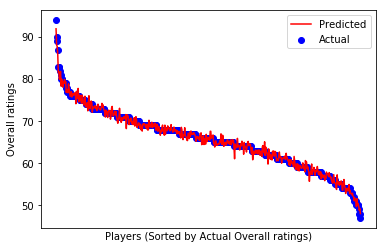

In [15]:
# Plotar saídas
plt.scatter(range(0,y_test.shape[0]), y_test,  color='blue', label="Actual")
plt.plot(range(0,y_test.shape[0]), y_pred, color='red', label="Predicted")

#adiciona ticks, rótulos, legenda
plt.xticks(())
plt.xlabel("Players (Sorted by Actual Overall ratings)")
plt.ylabel("Overall ratings")
plt.legend(loc='upper right')
plt.show()

## Fechamento

Bom trabalho! Você conseguiu!

A seguir, você pode brincar um pouco com esse conjunto de dados.
- Tente selecionar jogadores em outra posição, ou seja, goleiro (“GK”), quais características serão as mais correlacionadas? quais serão os recursos que você selecionou?
- Altere os recursos selecionados. Isso alterará os resultados da previsão do modelo?
- Altere a proporção de dados de treinamento/teste, veja o que acontecerá.
- Altere a variável alvo, por exemplo, 'Value' ou 'Wage'. Tente descobrir como converter o conteúdo em valor numérico (dica: 50k = 50 * 1000, 10M = 10 * 1000 * 1000.)

Na aula de hoje, você aprendeu como treinar um modelo de regressão linear para estimar as avaliações gerais de um jogador de futebol. Esperamos que tenham gostado e tenham se inspirado um pouco.

A partir de agora, você pode explorar o site [kaggle](http://kaggle.com) e tentar encontrar outro conjunto de dados para reproduzir. Aplique regressão linear para prever/estimar os resultados. Você ficará surpreso com o que pode ser feito.